#INDICACIONES : Para ejecutar los ejercicios vistos en clases , realizar una copia de este Google Colab o ejecutar las lineas de codigo en un Google Colab o entorno propio.

Para realizar la copia de este Google Colab , vas a la parte superior en "File", se abrirá un desplegable y se seleccionará el boton " Save a copy in Drive". Sobre ese nuevo Google Colab creado, si pueden ejecutar cambios.

Se pide no realizar cambios sobre este link original, solo en su propia copia creada.

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Basic regression to predict fuel efficiency
# Code is based on this tutorial: https://www.tensorflow.org/tutorials/keras/regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas
import seaborn as sns
import missingno as msno

# # Make numpy printouts easier to read.
# np.set_printoptions(precision=3, suppress=True)

In [7]:
pip install tensorflow

  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 45.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
print(np.__version__)

2024-04-19 02:22:41.871367: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 02:22:42.271902: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 02:22:42.453800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 02:22:43.698111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1
1.26.4


In [9]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [10]:
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [12]:
dataset.isna().sum() #Nan

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<Axes: >

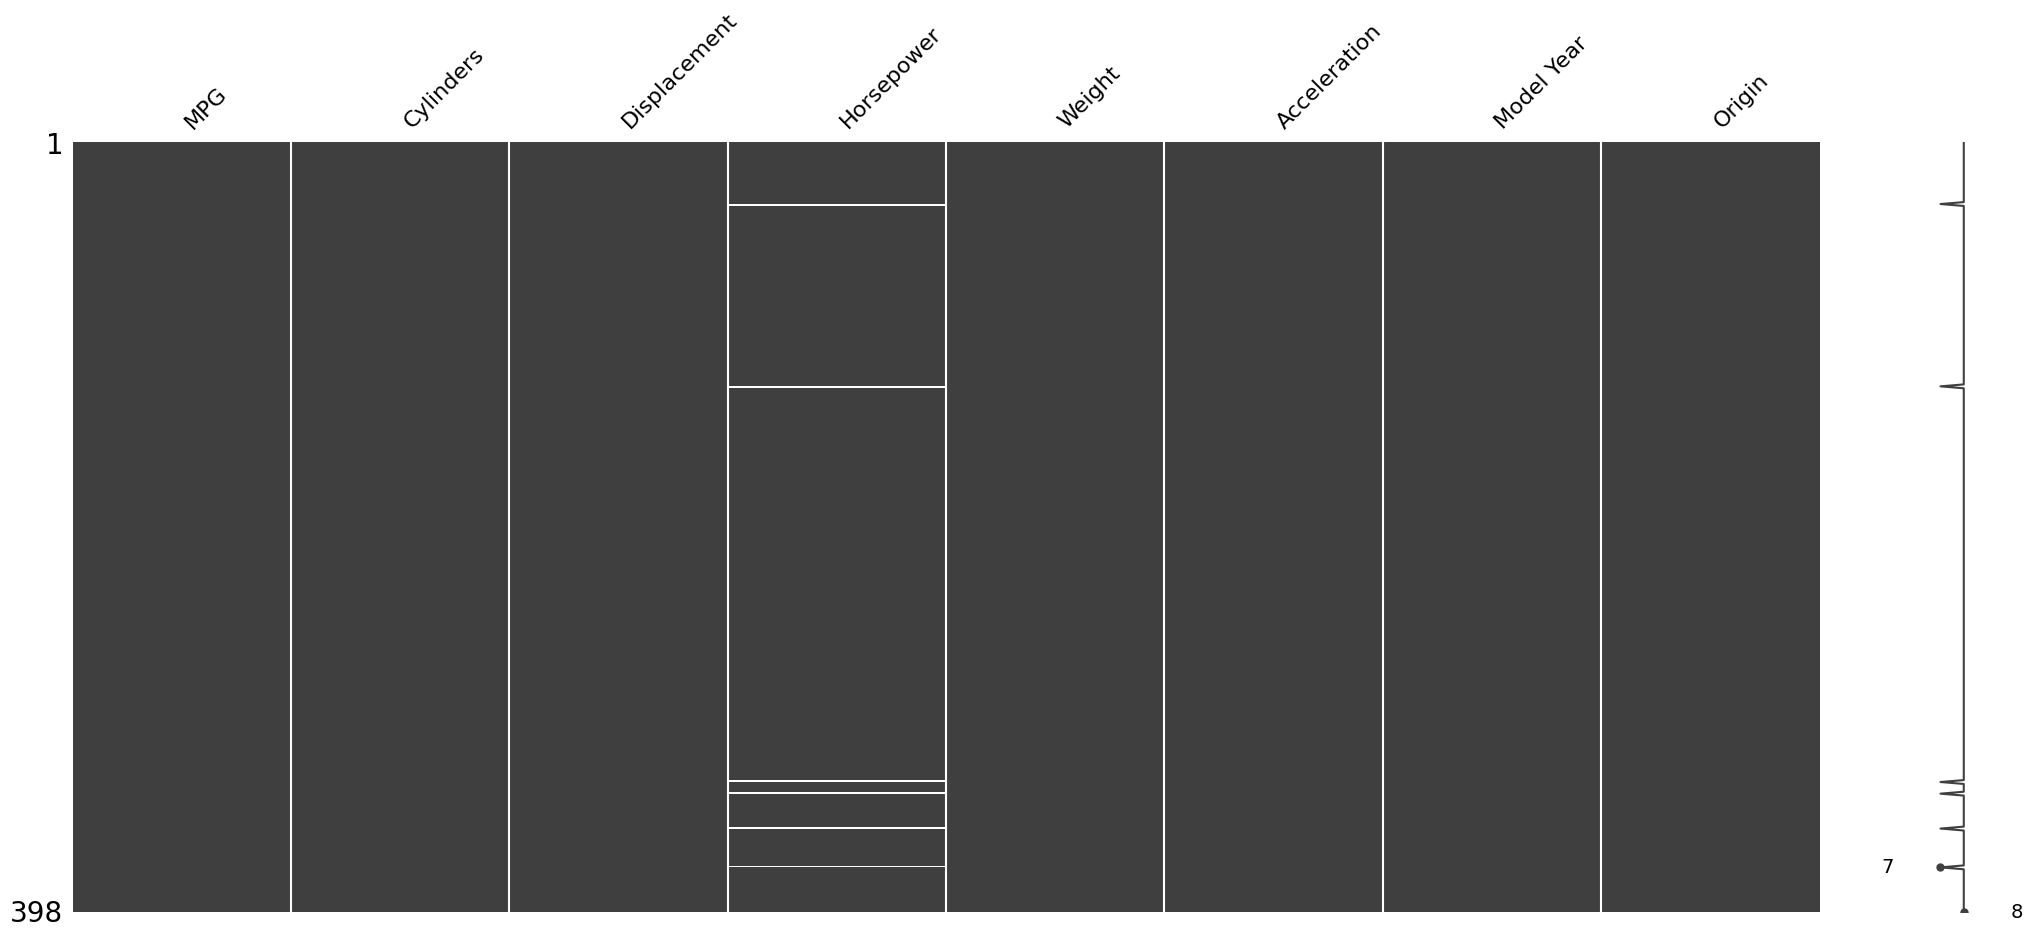

In [13]:
#  msno.bar(dataset)
msno.matrix(dataset)

In [14]:
# clean data
dataset = dataset.dropna()

# convert categorical 'Origin' data into one-hot data
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
print(dataset)
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
print(dataset)


      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70     USA  
1            70     USA  
2            70     USA  
3            70     USA  
4    

In [15]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [16]:
# Split the data into train and test

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [17]:
# split features from labels

train_features = train_dataset.copy() # X train
test_features = test_dataset.copy() # X testeo

train_labels = train_features.pop('MPG') ## y _train
test_labels = test_features.pop('MPG')   #$ Y - test

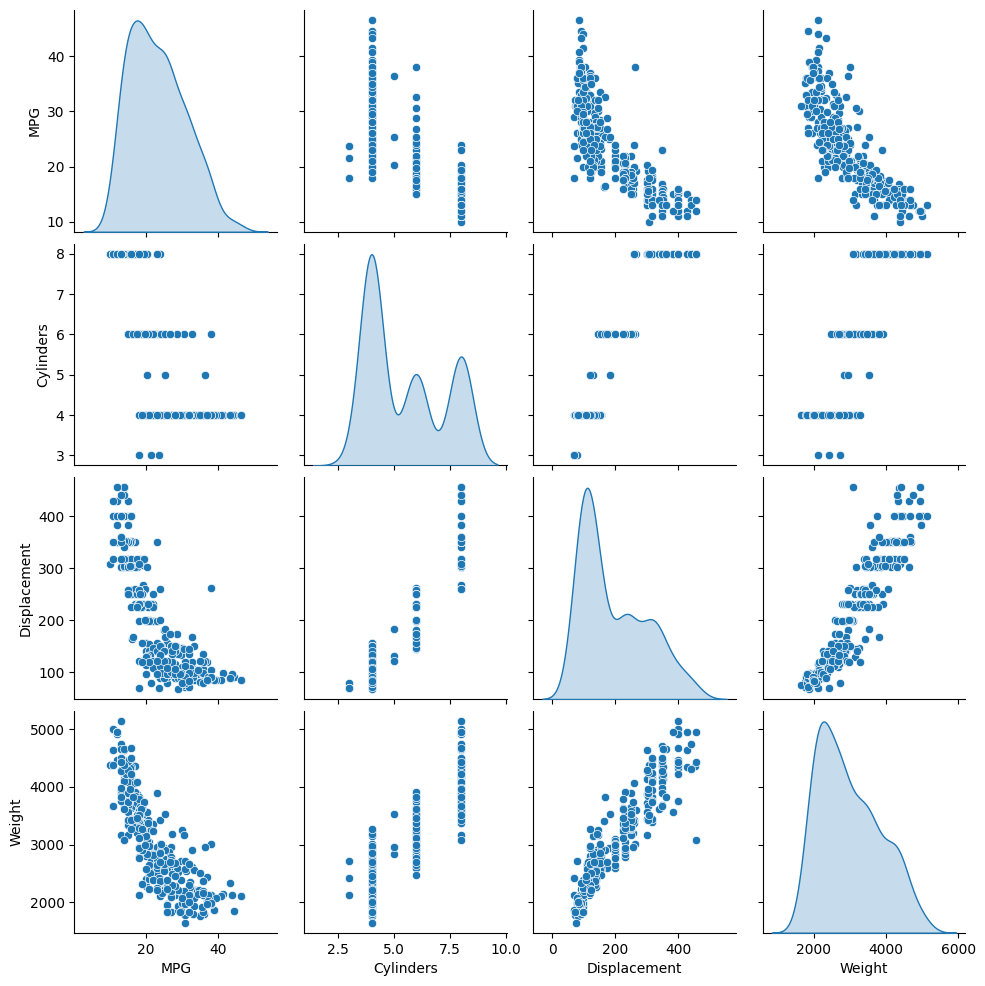

In [18]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [19]:
## scaler
# Normalize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())


[[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
  7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]]
[[2.8800762e+00 1.0850414e+04 1.4466995e+03 7.0989681e+05 7.7550263e+00
  1.3467321e+01 1.4653738e-01 1.5846485e-01 2.3457341e-01]]


In [21]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())


First example: [[4 90.0 75.0 2125.0 14.5 74 False False True]]
Normalized: [[-0.87073565 -1.0110704  -0.78530395 -1.0269395  -0.3803653  -0.5172201
  -0.46589085 -0.49601588  0.77591294]]


In [22]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = layers.Normalization(input_shape=[1,], axis=None)

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(314,) (314, 9)


/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Sequential model
horsepower_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])


In [24]:

horsepower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [27]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError J
#optim = keras.optimizers.SGD(lr=0.1)
optim = keras.optimizers.SGD(learning_rate=0.1)

horsepower_model.compile(optimizer=optim, loss=loss)

In [28]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=20,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data. 80 /20 -  20(80) = Validation ||| 80(80)  = Training ||| 20 = Testeo
    validation_split = 0.2)

Epoch 1/20


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.6936 - val_loss: 22.9343
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.6122 - val_loss: 22.1343
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.4856 - val_loss: 21.3343
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5578 - val_loss: 20.5343
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2604 - val_loss: 19.7343
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.5933 - val_loss: 18.9343
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.3479 - val_loss: 18.1344
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0415 - val_loss: 17.3344
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8139 - val_loss: 16.5344
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4598 - val_loss: 15.7344
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5909 - val_loss: 14.9344
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.1381 - val_loss: 14.1344

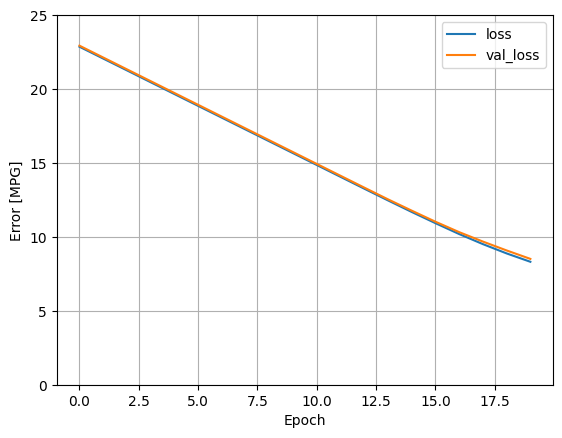

In [29]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [30]:

test_results = {}
print(test_features.shape)

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=1)

(78, 9)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5132 


In [31]:
# predict and plot
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [32]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

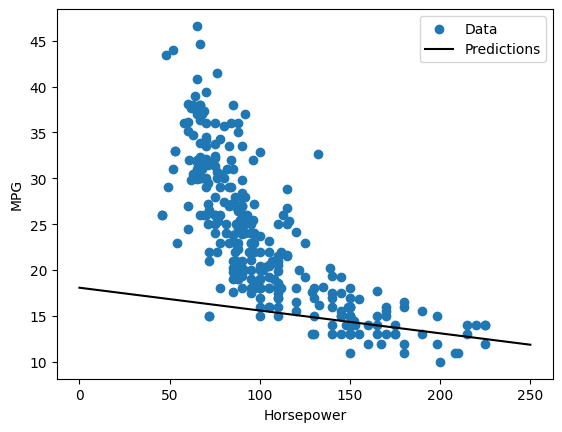

In [33]:
plot_horsepower(x, y)

In [34]:
# DNN
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [35]:
dnn_model.compile(loss=loss,
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [36]:
%%time
history = dnn_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 22.8958 - val_loss: 23.5560
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.1860 - val_loss: 23.3320
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.0561 - val_loss: 23.0666
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.3986 - val_loss: 22.7388
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.2496 - val_loss: 22.3144
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6191 - val_loss: 21.7617
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.4041 - val_loss: 21.0470
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.3835 - val_loss: 20.1269
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.1392 - val_loss: 18.9671
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.4606 - val_loss: 17.6303
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6850 - val_loss: 16.1817
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.3233 - val_lo

In [37]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7891 


2.951104164123535

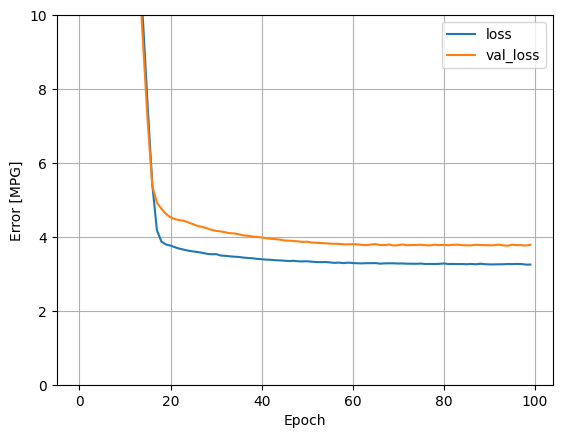

In [38]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


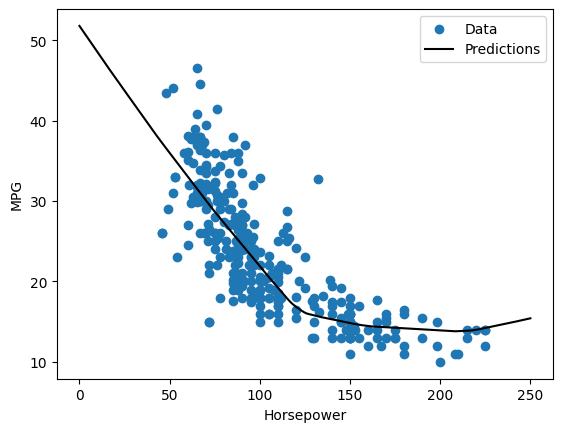

In [42]:
# predict and plot
x = tf.linspace(0, 250, 200)
y = dnn_model.predict(x)

plot_horsepower(x,y)

## Extra

In [ ]:
import tensorflow as tf
import numpy as np

# Definir una red neuronal simple con una sola neurona
class SimpleNeuralNetwork(tf.keras.Model):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.dense = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        return self.dense(inputs)

# Crear una instancia de la red neuronal
model = SimpleNeuralNetwork()

# Congelar los pesos de la neurona
for layer in model.layers:
    for param in layer.trainable_variables:
        print(param)
        param.trainable = False

# Definir los datos de entrenamiento
x_train = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]])
y_train = np.array([[2.0], [4.0], [6.0], [8.0], [10.0]])

# Compilar el modelo
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=100)

# Obtener las predicciones
x_test = np.array([[6.0], [7.0], [8.0]])
predictions = model.predict(x_test)

print(predictions)


Epoch 1/100
1/1 [==============================] - 1s 667ms/step - loss: 22.5575
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1555
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6765
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 4.4835
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 2.6227
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5382
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9062
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5378
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3231
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1979
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1249
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0822
Epoch 13/100
1/1 [==============================] - 0s 8m